# Recognising Handwritten Digits on MNIST Dataset using KNN

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Step 1. Data Preparation

In [2]:
df = pd.read_csv('../Pandas/mnist_train.csv')
print(df.shape)

(42000, 785)


In [4]:
df.columns

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)

In [5]:
df.head()

label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0  
1         0         0         0         0  
2         0         0         0         0  
3         0         0         0         0  
4         0         0         0         0  

[5 rows x 785 columns]

In [6]:
data = df.values
print(data.shape)
print(type(data))

(42000, 785)
<class 'numpy.ndarray'>


In [7]:
X = data[:,1:]
Y = data[:,0]
print(X.shape,Y.shape)

(42000, 784) (42000,)


### Split the data for train and test

In [8]:
split = int(0.8*X.shape[0])
print(split)

X_train = X[:split,:]
Y_train = Y[:split]

X_test = X[split:,:]
Y_test = Y[split:]

print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

33600
(33600, 784) (33600,)
(8400, 784) (8400,)


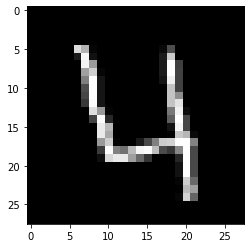

In [10]:
def drawImg(sample):
    img = sample.reshape((28,28))
    plt.imshow(img,cmap='gray')
    plt.show()

drawImg(X_train[3])

## Step 2. K-NN

In [12]:
print(X_train.shape[0])

33600


In [35]:
def get_dist(x1,x2):
    return np.sqrt(sum((x1-x2)**2))

def k_nn(X,Y,query,k=5):

    dist = []
    
    for i in range(X.shape[0]):
        dist.append((get_dist(X[i],query),Y[i]))
        
    dist = sorted(dist)
    dist = dist[:k]
    
    dist = np.array(dist)
    
#     print(dist.shape)
    
    dist = np.unique(dist[:,1],return_counts=True)
    index = dist[1].argmax() 

    return int(dist[0][index])

In [40]:
k_nn(X_train,Y_train,X_test[434])

6

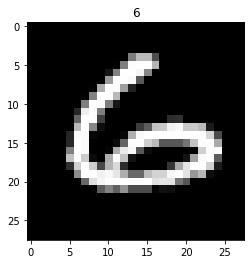

In [41]:
plt.imshow(X_test[434].reshape((28,28)),cmap='gray')
plt.title(Y_test[434])
plt.show()

In [42]:
print(X_test.shape)

(8400, 784)


In [46]:
# to calculate the accuracy we can call the function below
# it takes a lot of time to compute
# here we only ran for 20 test samples because for all n it takes a lot of time

def calculate_accuracy():
    match = 0
    n = X_test.shape[0]
    for i in range(20):
        if k_nn(X_train,Y_train,X_test[i])==Y_test[i]:
            match+=1
    return match/20

print(calculate_accuracy())

0.95
